In [1]:
### Image Generator

%load_ext autoreload
%autoreload 2

import time
import cv2
print(cv2.__version__)
import numpy as np


from handDetector import HandDetector

pTime = 0
cTime = 0
detector = HandDetector()


cap = cv2.VideoCapture(0)

while cap.isOpened():

    success, img = cap.read()
    if not success:
      # If loading a video, use 'break' instead of 'continue'.
      continue

   

    detector.fit(img)
    img = detector.transform_draw(img)
    img = detector.transform_connect_lines(img)
    img = detector.transform_square(img)

   
    cv2.imshow("Image", cv2.flip(img, 1))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

4.6.0


objc[49939]: Class CaptureDelegate is implemented in both /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161ea2538) and /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x11fa90860). One of the two will be used. Which one is undefined.
objc[49939]: Class CVWindow is implemented in both /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161ea2588) and /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x10fee4a68). One of the two will be used. Which one is undefined.
objc[49939]: Class CVView is implemented in both /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161ea25b0) and /opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.

4.6.0


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [29]:
%load_ext autoreload
%autoreload 2

import time
import cv2
import numpy as np
import imutils

from handDetector import HandDetector


def put_text(img, text):

  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 0.5
  color = (255, 0, 0)
  thickness=1

  y0, dy = 15, 15
  for i, line in enumerate(text):
    y = y0 + i*dy
    cv2.putText(img, line, (5, y ), font, fontScale, color, thickness, cv2.LINE_AA)

detector = HandDetector()
cap = cv2.VideoCapture(0)

SHOW_WIDTH = 500
NO_KEY = -1#ord('p')
ESC_KEY = 27

keys_pressed = {}

img = 255 * np.ones(shape=[SHOW_WIDTH, SHOW_WIDTH, 3], dtype=np.uint8)
cv2.imshow("Image", img)
cv2.waitKey(0)


file = 'out/lala.csv'
f=open(file,'ab')


while cap.isOpened():

  success, img = cap.read()
  if not success:
    break

  k = cv2.waitKey(1)
  if k == ESC_KEY:
    break

  img = imutils.resize(img, width=SHOW_WIDTH)
  detector.fit(img)

  if detector.found_hands():

    if k != NO_KEY:

      lm_norms = detector.get_positions_normalized()
      # squares = detector.get_hands_squared()
      img_all_hands = None

      # assert(len(lm_norms)==len(squares))

      for h_k, lm_norm in enumerate(lm_norm):
        # Save the array
        arr = lm_norm
        arr = np.insert(arr, 0, k)
        np.savetxt(f,[arr], delimiter=',', fmt="%5f")

        # Keep the numbers of press keyed
        keys_pressed[k] = keys_pressed.get(k, 0) + 1
    
      #   # Create the visual for the window
      #   a,b = squares[h_k]
      #   img_hand = img[a[1]: b[1],a[0]: b[0]]
      #   img_hand = cv2.resize(img_hand, (200,200))
      #   img_all_hands = img_hand if img_all_hands is None else np.concatenate((img_hand, img_all_hands), axis=1)
      # # Following is just for visuals

  #     if img_all_hands is not None:
  #       cv2.imshow("Hands", img_all_hands)

  # else:
  #   cv2.destroyWindow("Hands")

  # Main window visuals
  img = detector.transform_draw(img)
  img = detector.transform_connect_lines(img)
  put_text(img, [f"{str(n)} ({chr(n)}): {str(f)}" for n,f in keys_pressed.items()])
  cv2.imshow("Image", img)

f.close()
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
424 517 127 267
(408, 612, 3)


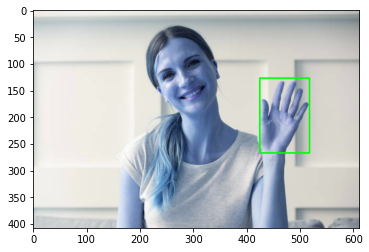

In [30]:
%load_ext autoreload
%autoreload 2



import time
import cv2
import numpy as np
from matplotlib import pyplot as plt

from handDetector import HandDetector

pTime = 0
cTime = 0
detector = HandDetector()


#cap = cv2.VideoCapture(1)

path = 'img/waving.jpg'
img = cv2.imread(path)

detector.fit(img)
# img = detector.transform_draw(img)
# img = detector.transform_connect_lines(img)
img = detector.transform_square(img)


plt.imshow(img)
plt.show()

In [24]:
# h, w, c = img.shape

# for lm in detector.results_.multi_hand_landmarks:
#     x, y = int(lm.x * w), int(lm.y * h)


hands = detector._get_positions()

# [x for x in [y.values() for y in h.values()]]

# for x in [r for r in h.values()]:
#     print(x, "_")

# def get_all_keys(d):
#     for key, value in d.items():
#         yield key
#         if isinstance(value, dict):
#             yield from get_all_keys(value)

# for x in get_all_keys(h):
#     print(x)
x = detector.get_positions_normalized()
   # print(h)
# x_max = max([val[0] for dic in h for val in dic.values()])
# y_max = max([val[1] for dic in h for val in dic.values()])
# x_min = min([val[0] for dic in h for val in dic.values()])
# y_min = min([val[1] for dic in h for val in dic.values()])

# cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# plt.imshow(img)
# plt.show()

x[0]

array([0.50749062, 0.47704321, 0.44650249, 0.42486418, 0.40396797,
       0.43698094, 0.40712013, 0.38900574, 0.37722821, 0.44699578,
       0.41945315, 0.4010914 , 0.38860286, 0.46195657, 0.4376905 ,
       0.42331631, 0.41036414, 0.47951401, 0.46347044, 0.45262018,
       0.44319194])

In [36]:
a = (2,3)
b = (4,6)
c = [a,b]

q,w,e,r = c[0], c[1]

ValueError: not enough values to unpack (expected 4, got 2)

In [61]:

file = 'out/lala.csv'

f=open(file,'ab')

np.savetxt(f,[x[0]], delimiter=',', fmt="%5f")

f.close()

In [1]:
import numpy as np
import cv2

im = np.zeros((100, 300), np.uint8)
cv2.imshow('Keypressed', im)
while True:
  key = cv2.waitKey(0)
  im_c = im.copy()
  cv2.putText(
    im_c,
    f'{chr(key)} -> {key}',
    (10, 60), 
    cv2.FONT_HERSHEY_SIMPLEX, 
    1,
    (255,255,255),
    2)
  cv2.imshow('Keypressed', im_c)
  if key == 27: break # 'ESC'

In [9]:
import numpy as np
numpy_zeros = np.zeros(shape=(6, 6))
numpy_zeros[1:5, 1:3] = 1

print(numpy_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [20]:
import numpy as np
numpy_zeros = np.zeros(shape=(6, 6))
numpy_zeros[:-3, 1:-1] = 1

print(numpy_zeros)

[[0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
